# Early Data Analysis
Interpreting data from `batch_analyse.py`. The aim is to filter out the dataset to the required properties to explore potential exocomet-type transits.

In [2]:
import os 
os.chdir('../')
import pandas as pd
from matplotlib import pyplot as plt
from astropy.stats import median_absolute_deviation
import matplotlib.patches as patches
import glob
import data
import os
from astropy.table import Table, unique
from analysis_tools_cython import *
from post_processing_tools import *
from tqdm import tqdm

---

## Creating DataFrame
- data used is `corrected flux`, not PCA.

In [4]:
df = get_output('output_log/s6_xrp_median.txt')
filtered_df = filter_df(df)

# df_05 = get_output('output_log_xrp/output_s6_005_twostep.txt')
# filtered_df_05 = filter_df(df_05)

# df_onestep = get_output('output_log_xrp/output_onestep_008_s6.txt')

# df_onestep_05 = get_output('output_log_xrp/output_onestep_005_s6.txt')

In [5]:
df['transit_prob'].unique()

array(['maybeTransit', 'artefact', 'point', 'end'], dtype=object)

`filtered_df` with `maybeTransit` only

In [6]:
df[df.transit_prob == 'maybeTransit']

,file,signal,snr,time,asym_score,width1,width2,duration,depth,transit_prob
0,tesslc_32640099.pkl,-3.981688,-2.407057,1475.243575,1.056073,0.040672,2.242696e-02,0.083332,402.512484,maybeTransit
1,tesslc_159033808.pkl,-3.741361,-2.462790,1485.703721,1.076671,0.100005,3.486400e-04,0.187497,1212.875342,maybeTransit
2,tesslc_306771787.pkl,-5.152670,-4.029732,1476.468822,1.018720,0.306099,3.221516e-02,0.770848,323.807381,maybeTransit
3,tesslc_140938685.pkl,-7.117436,-4.900724,1476.697658,1.012632,0.182946,9.338835e-02,0.395832,282.463238,maybeTransit
4,tesslc_255700743.pkl,-4.132594,-3.154384,1475.491555,0.991786,0.140180,6.287429e-02,0.312502,161.495720,maybeTransit
...,...,...,...,...,...,...,...,...,...,...
2779718,tesslc_247798630.pkl,-15.887542,-7.542011,1473.495804,0.961099,0.181076,7.034922e-02,0.354161,968.152153,maybeTransit
2779719,tesslc_272126756.pkl,-5.586754,-4.345226,1471.822609,0.997982,0.000014,3.601144e-02,0.479173,523.209924,maybeTransit
2779720,tesslc_47720104.pkl,-4.613525,-3.680738,1471.639777,1.134528,0.124670,5.000000e-08,0.187501,602.066205,maybeTransit
2779722,tesslc_102207004.pkl,-30.495789,-7.216837,1473.433190,0.947986,0.216134,7.449281e-02,0.479160,739.103636,maybeTransit


---

In [22]:
df.duration.min()

0.02081285

In [7]:
#df.loc[df.file.str.contains("270577175")]

### Raw Plot

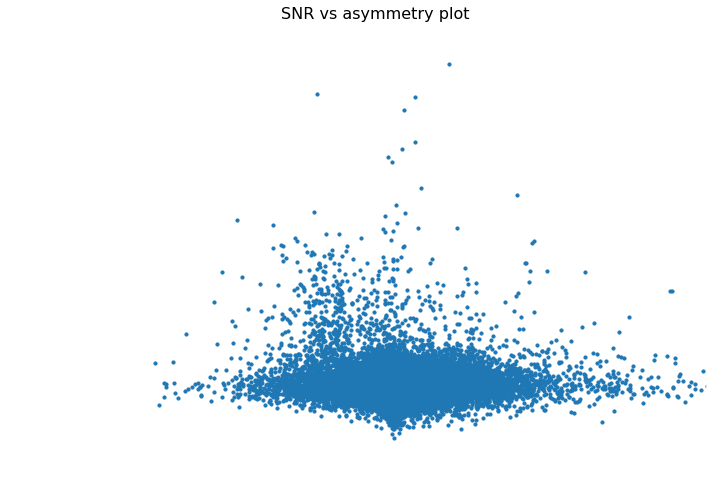

In [7]:
distribution(df.asym_score,abs(df['signal/noise']))

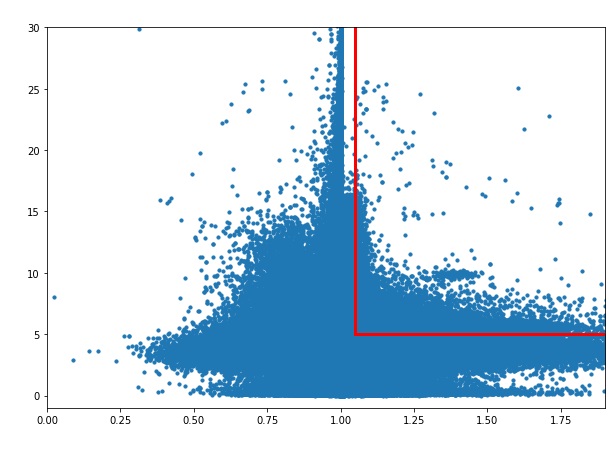

In [10]:
box = df[(df['snr'] <= -5) & (df['asym_score'] >= 1.05) & (df['transit_prob'] == 'maybeTransit') & (df['snr'] >= -20)]
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(df.asym_score,abs(df['snr']), s=10)
ax.set_xlim(-0, 1.9)
ax.set_ylim(-1, 30)
ax.set_title('SNR vs asymmetry plot',fontsize=20,color='white')
ax.set_xlabel("$\\alpha$", fontsize=16,color='white')
ax.set_ylabel("$S$", fontsize=16,color='white')
rect = patches.Rectangle((1.05, 5), 2, 30, linewidth=3, edgecolor='r', facecolor='none')

ax.add_patch(rect)
# ax.xaxis.label.set_color('white')        #setting up X-axis label color to yellow
# ax.yaxis.label.set_color('white')          #setting up Y-axis label color to blue
# ax.tick_params(axis='x', colors='white',labelsize=12)    #setting up X-axis tick color to red
# ax.tick_params(axis='y', colors='white',labelsize=12)

# ax.spines['left'].set_color('white')        # setting up Y-axis tick color to red
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')        # setting up Y-axis tick color to red
#ax.spines['bottom'].set_color('white')
#plt.savefig('poster/outcome.png',dpi=300,transparent=True)


### `MaybeTransit` only

In [9]:
# fig,ax = plt.subplots(figsize=(10,7))
# ax.scatter(df.asym_score[df.transit_prob == 'maybeTransit'],abs(df['signal/noise'][df.transit_prob == 'maybeTransit']),s=5)
# ax.set_xlim(0,1.9)
# ax.set_ylim(5,30)
# ax.set_xlabel('$\\alpha$',fontsize=14)
# ax.set_ylabel('$S$',fontsize=14)
# ax.set_title('asymmetry score vs signal',fontsize=18)
# fig.tight_layout()
# #rect = patches.Rectangle((1.30, 7.40), 0.25, 4, linewidth=3, edgecolor='k', facecolor='none')
# #interest_region = patches.Rectangle((1.05,7),3,20, linewidth=1,edgecolor='grey',facecolor='none') # region of interest in Kennedy et al
# #ax.add_patch(rect)
# #ax.add_patch(interest_region)
# plt.show()

Next steps - apply a feature that distinguishes false positives, EB's, etc.

---

### Exploring high SNR lightcurves

In [13]:
box = df[(df['snr'] <= -5) & (df['asym_score'] >= 1.05) & (df['transit_prob'] == 'maybeTransit')]

In [14]:
box

,file,signal,snr,time,asym_score,width1,width2,duration,depth,transit_prob
269,tesslc_434372079.pkl,-9.271552,-5.011460,1477.224964,1.208863,0.003514,0.882417,0.916662,207.202736,maybeTransit
403,tesslc_49705030.pkl,-12.606586,-5.922656,1476.202340,1.050396,0.398888,0.083709,0.937502,123.877387,maybeTransit
481,tesslc_140971953.pkl,-10.145490,-5.115634,1476.531168,1.091620,0.371827,0.032930,0.583330,1021.016583,maybeTransit
543,tesslc_118927199.pkl,-8.143343,-5.049700,1471.599084,1.081217,0.003551,0.162375,0.291669,349.851976,maybeTransit
691,tesslc_4252639.pkl,-28.088524,-5.417125,1477.140868,1.435688,0.072066,0.539117,0.895811,227.621903,maybeTransit
...,...,...,...,...,...,...,...,...,...,...
2778974,tesslc_340136613.pkl,-13.083830,-5.047613,1475.094832,1.094472,0.270038,0.000618,0.541677,190183.436465,maybeTransit
2779317,tesslc_408908804.pkl,-14.053267,-6.495922,1474.702900,1.334345,0.047124,0.003696,0.083333,99633.222202,maybeTransit
2779347,tesslc_34726568.pkl,-17.300205,-5.751728,1471.973643,1.051906,0.149775,0.278383,0.729168,210451.555909,maybeTransit
2779383,tesslc_282579782.pkl,-11.803971,-5.507062,1474.703837,1.220909,0.016300,0.076695,0.124999,216705.540372,maybeTransit


In [15]:
box2 = df.loc[df.file.str.contains("270577175")]

In [16]:
sector = 6
clip = 4
path = f'/storage/astro2/phrdhx/tesslcs/tesslcs_sector_{sector}_104/'
path2 = f'/storage/astro2/phsqzm/TESS/SPOC_30min/S0{sector}/'
mad_df = data.load_mad()

#### Saving TIC paths

In [14]:
# for i in tqdm(to_import):
#     file_paths = glob.glob(os.path.join(path,f'**/**/{i}'))[0]
#     ref = pd.read_pickle(glob.glob(os.path.join(path,f'**/**/{i}'))[0])
#     store = import_XRPlightcurve(file_paths,sector=sector,drop_bad_points=False)[1]
#     tic = store[0]
#     ra = store[1]
#     dec = store[2]
#     to_export = [tic,ra,dec]
#     with open("weird_tic_path.txt", "a") as output:
#         output.write(file_paths+'\n')

In [15]:
from astropy.stats import median_absolute_deviation

### Lightcurve plots

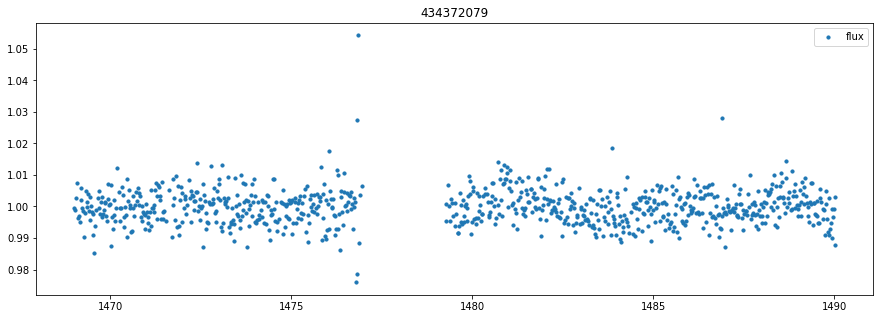

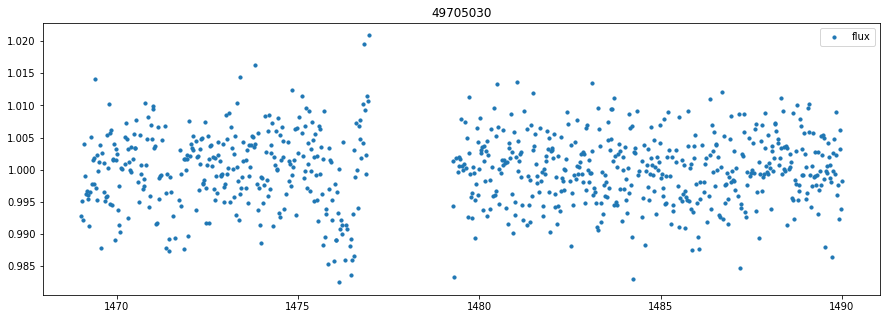

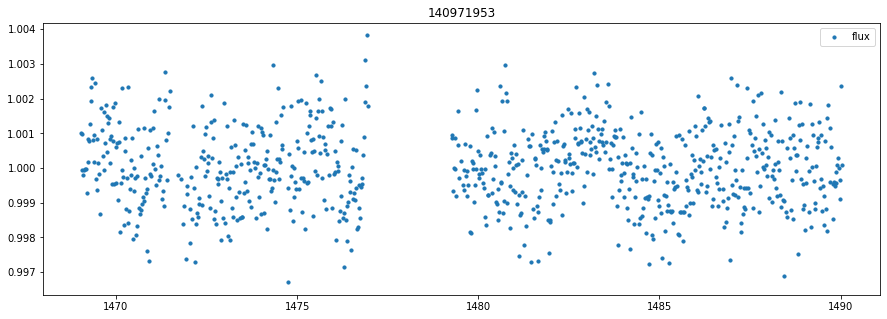

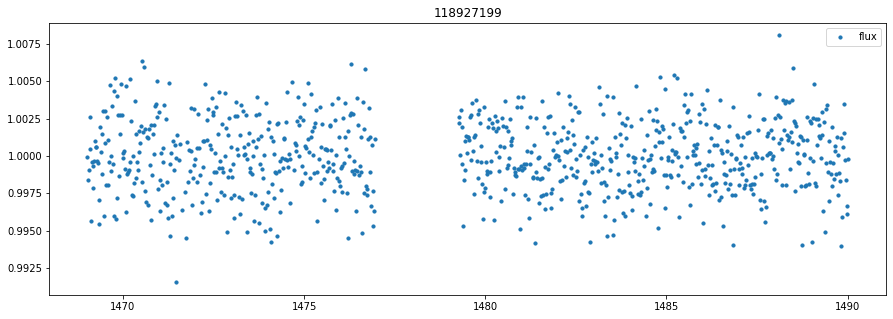

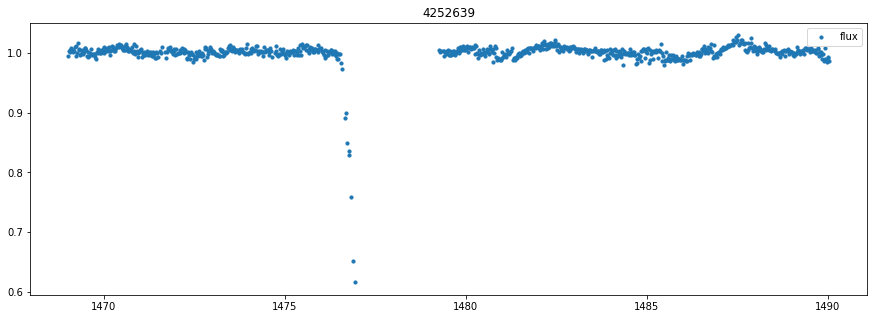

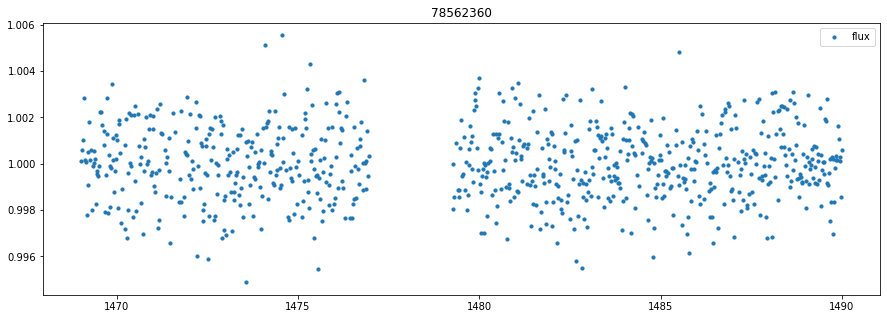

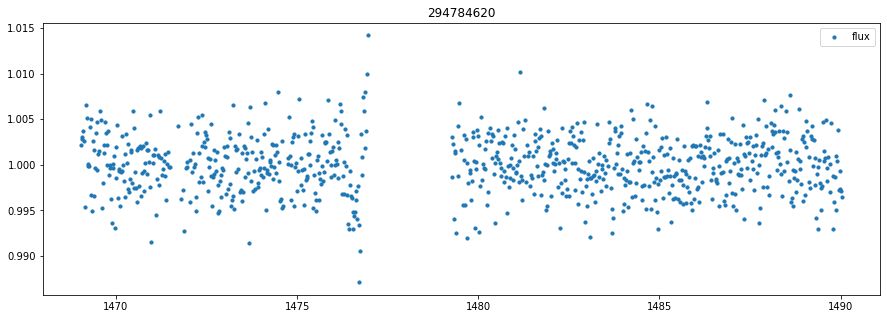

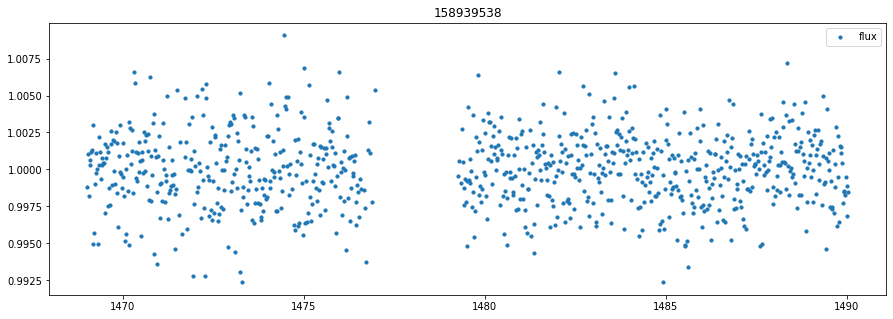

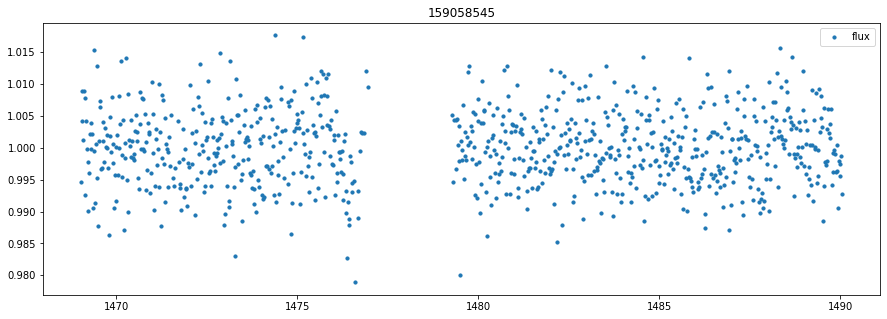

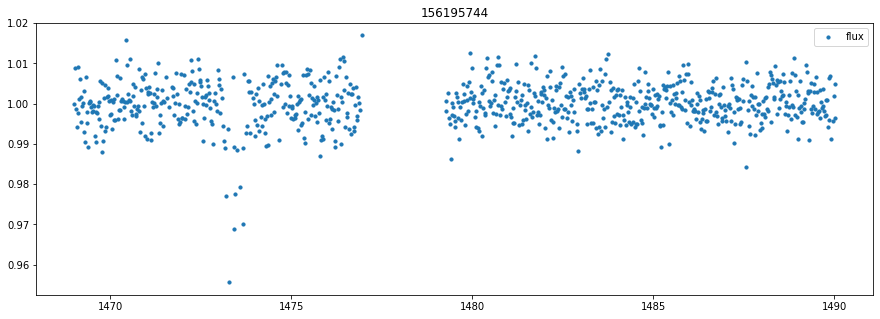

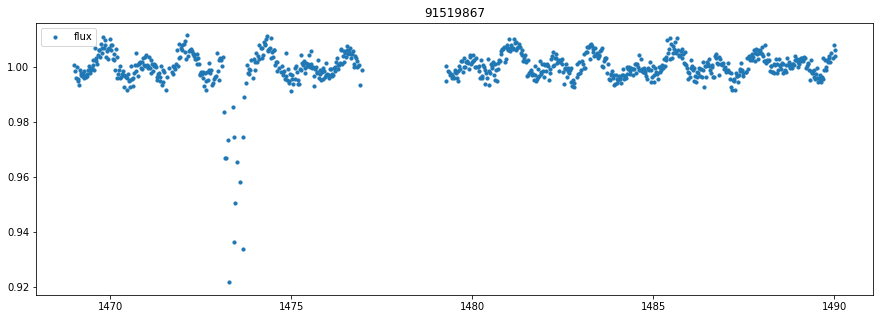

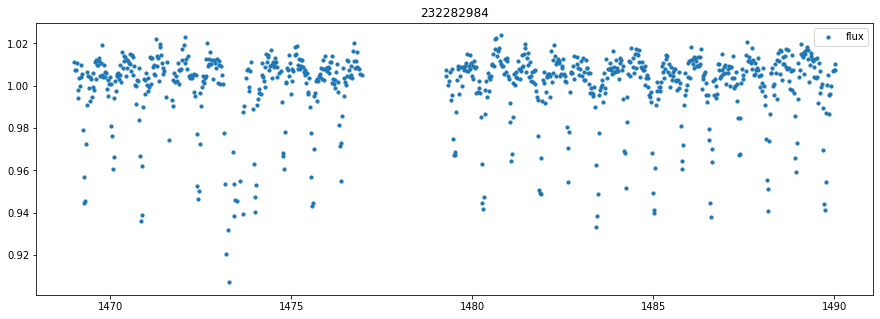

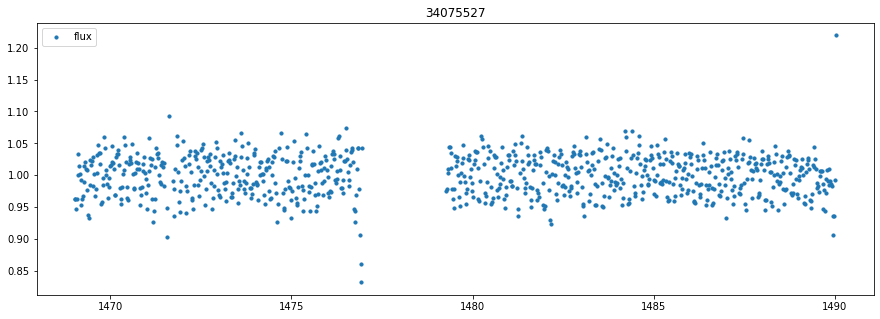

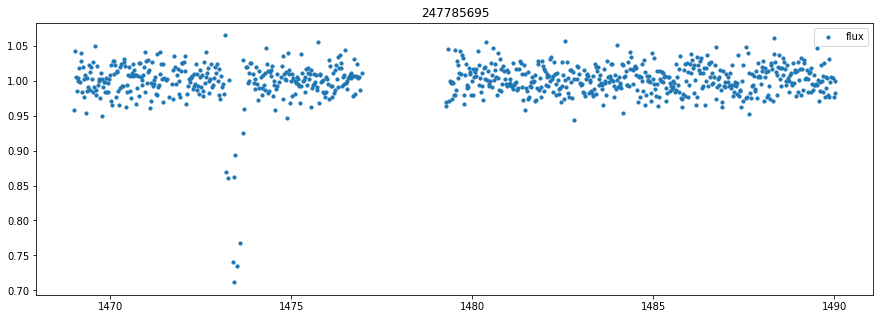

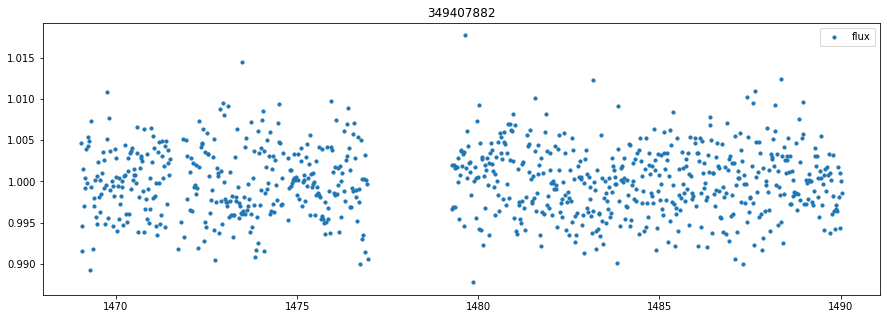

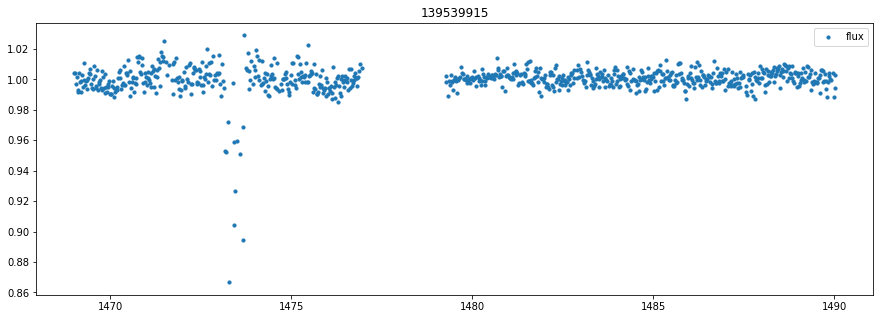

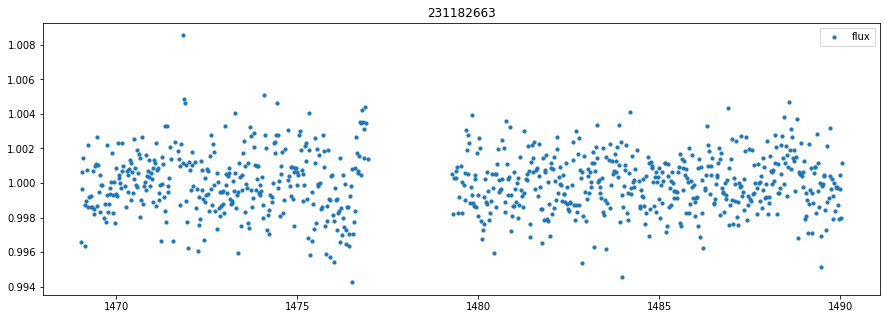

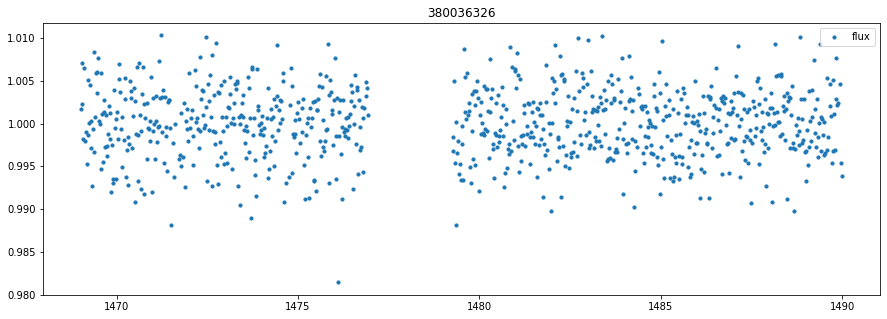

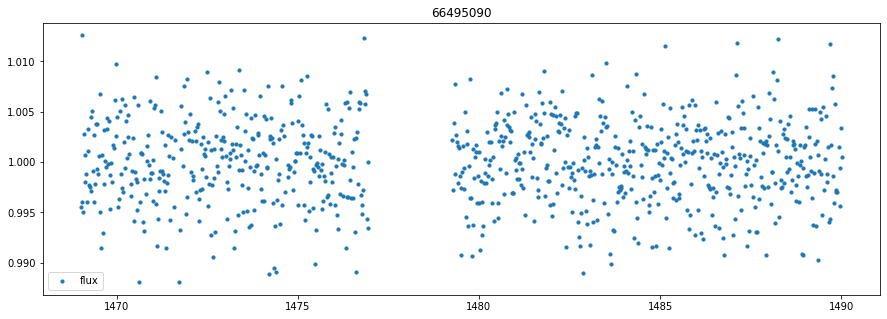

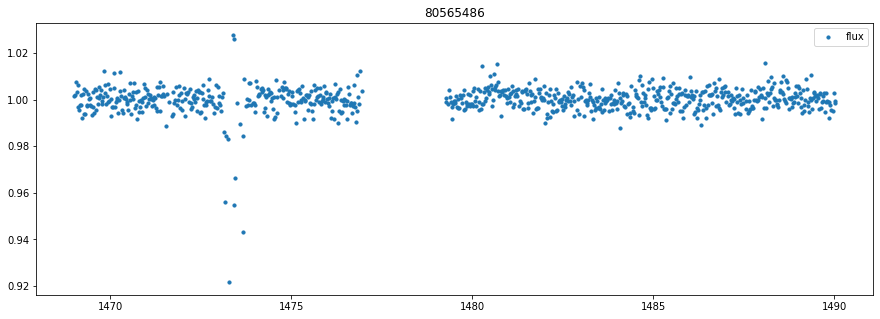

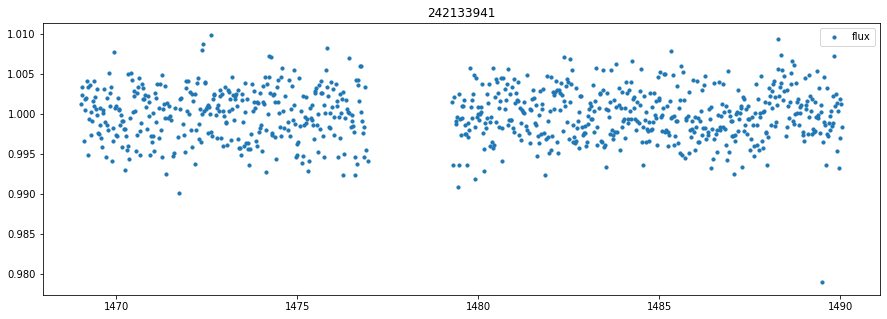

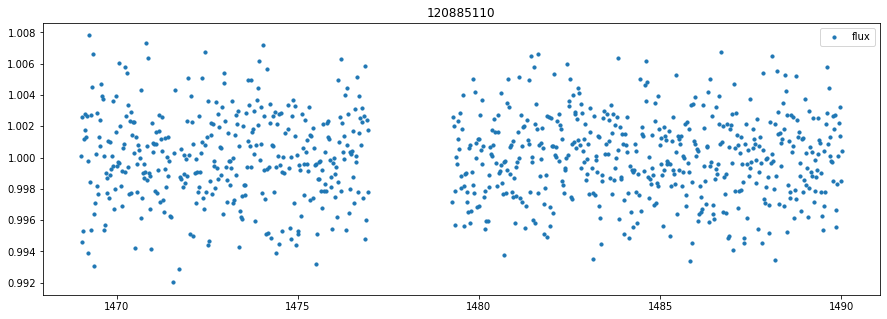

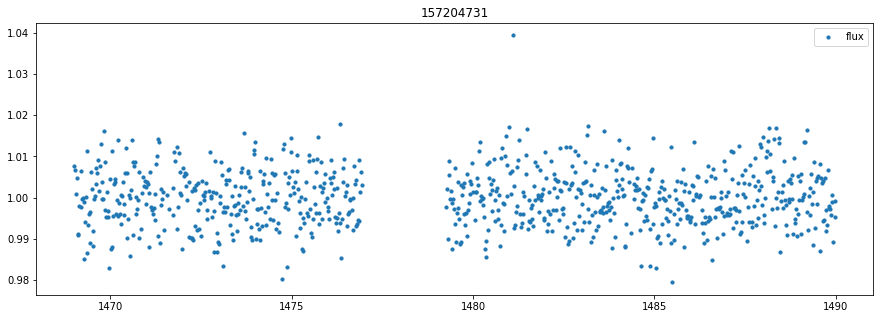

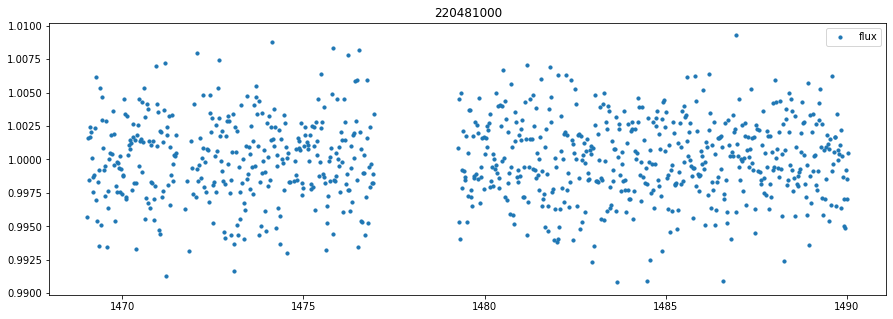

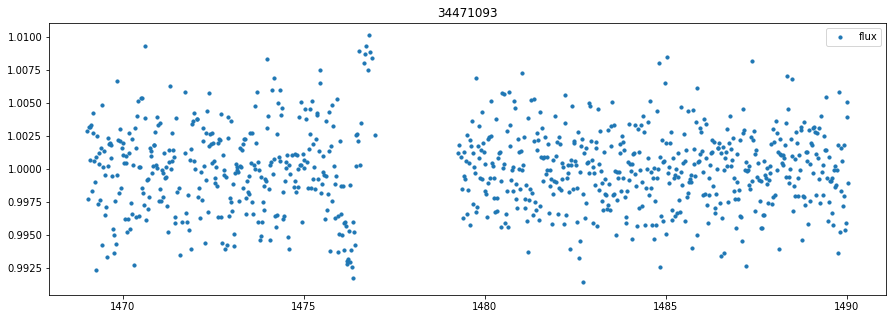

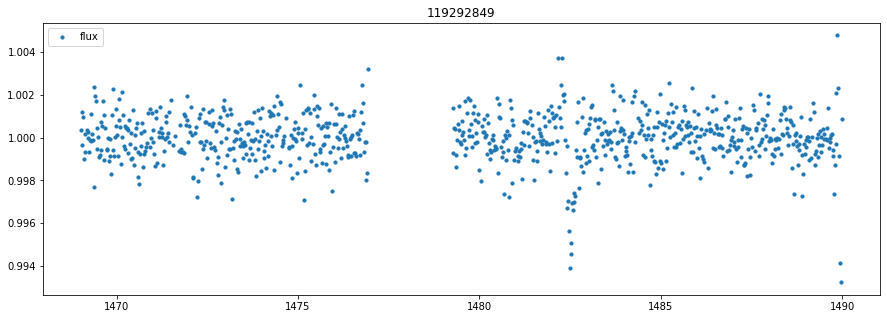

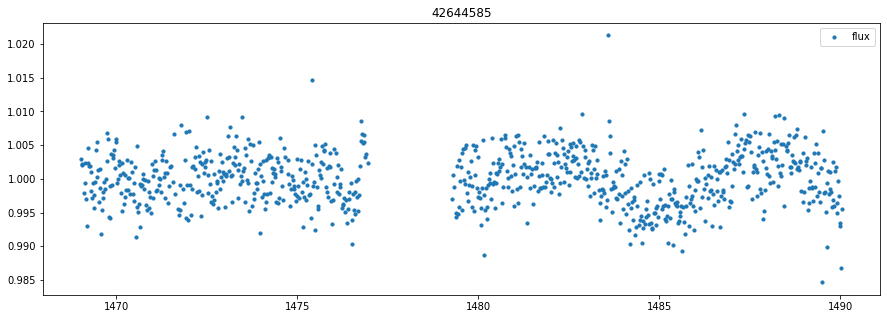

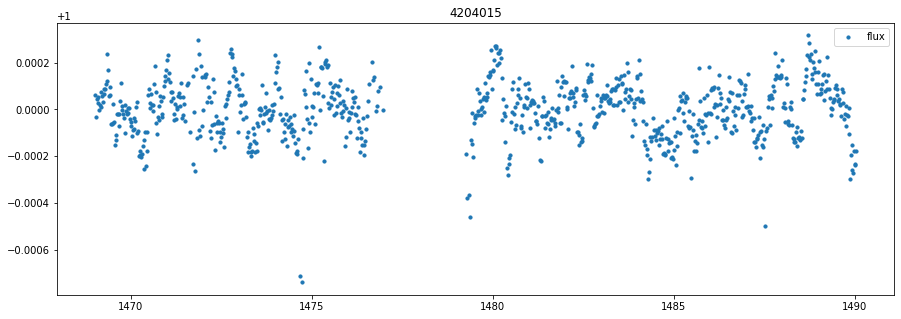

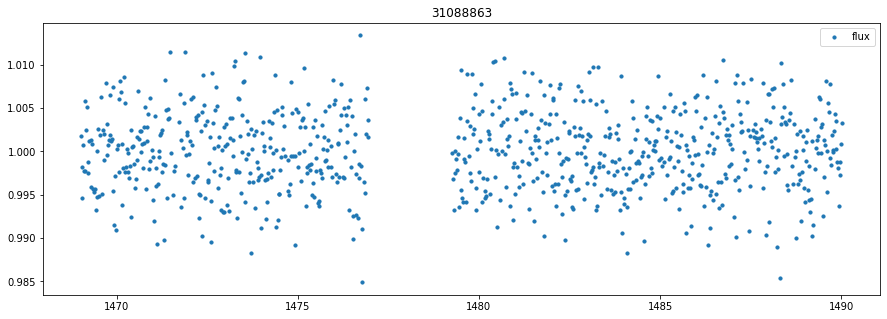

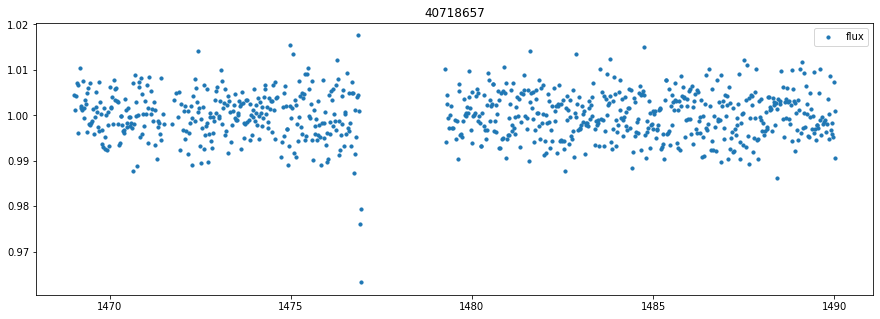

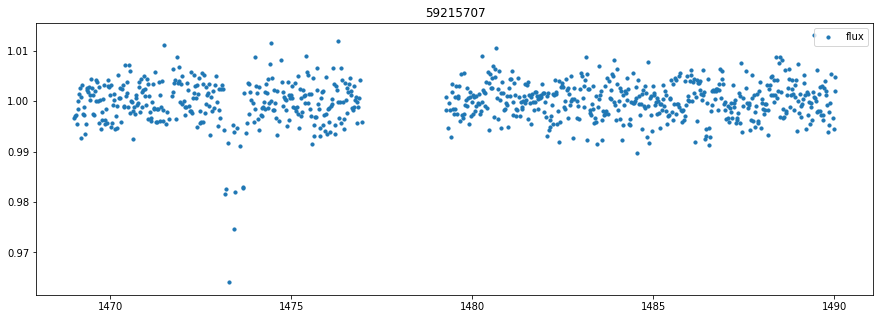

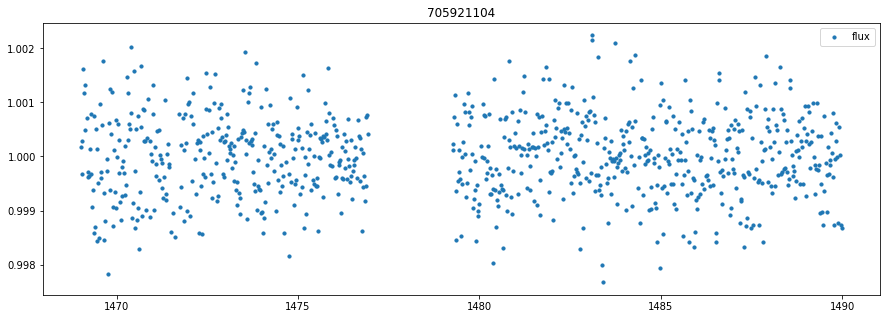

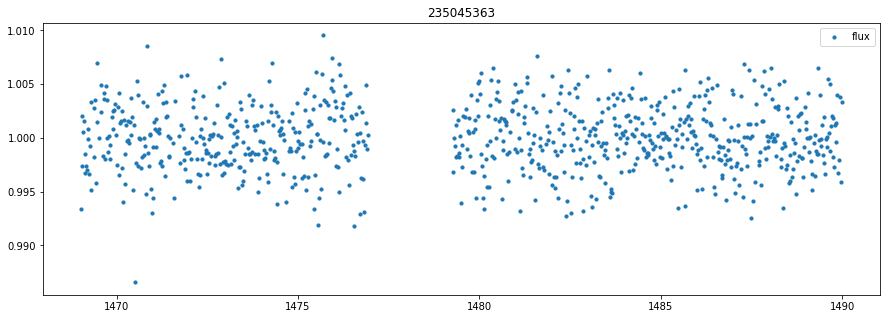

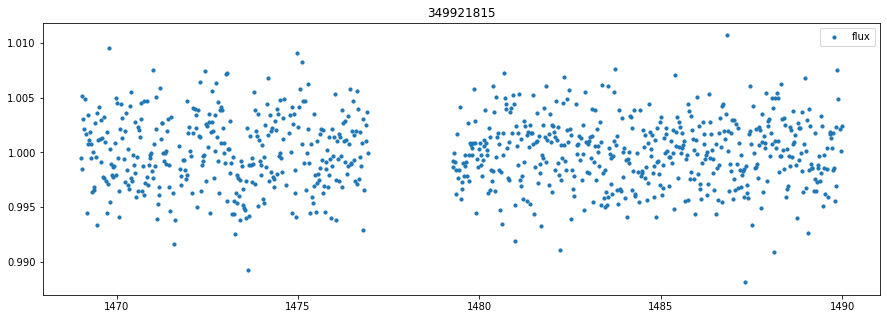

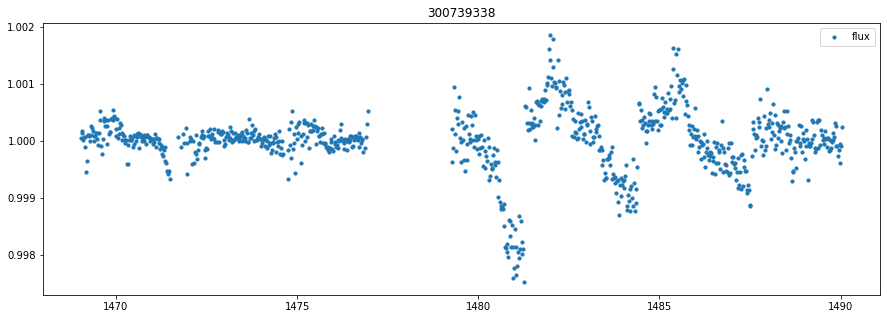

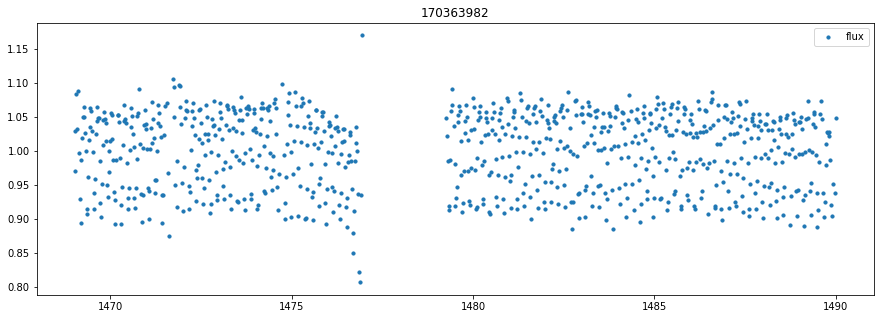

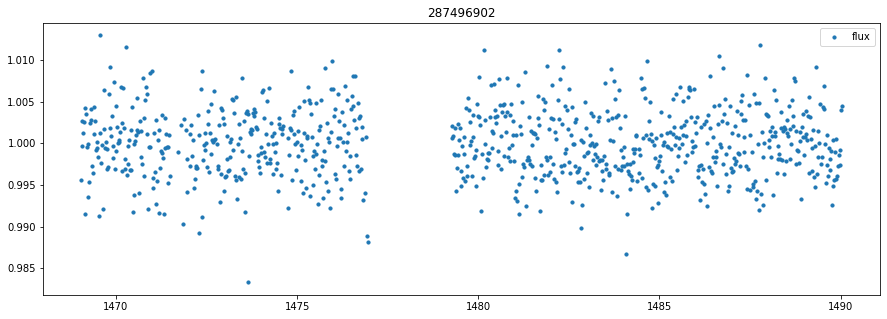

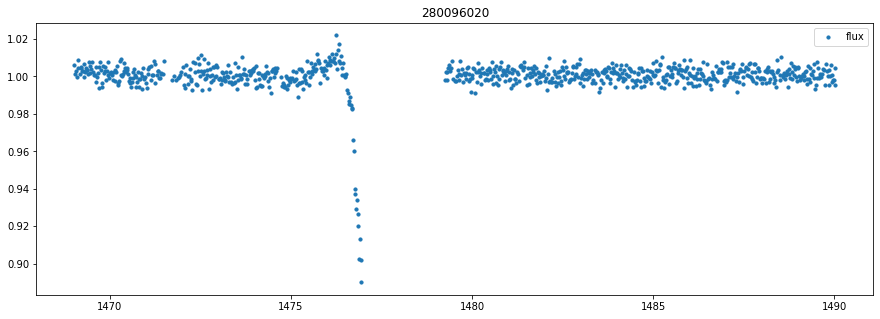

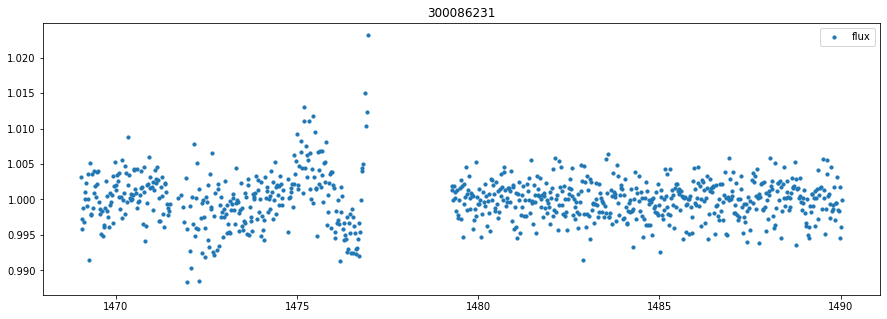

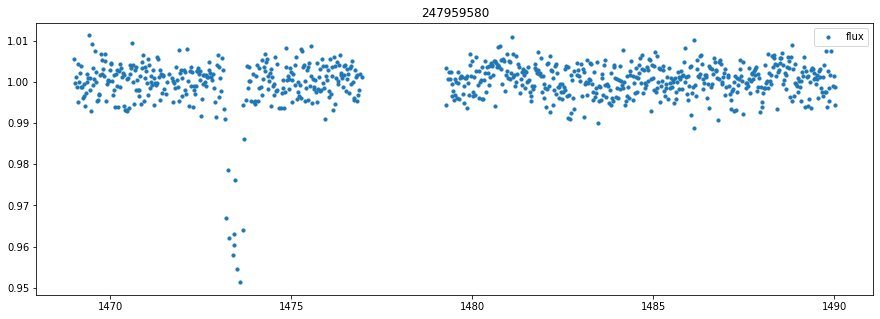

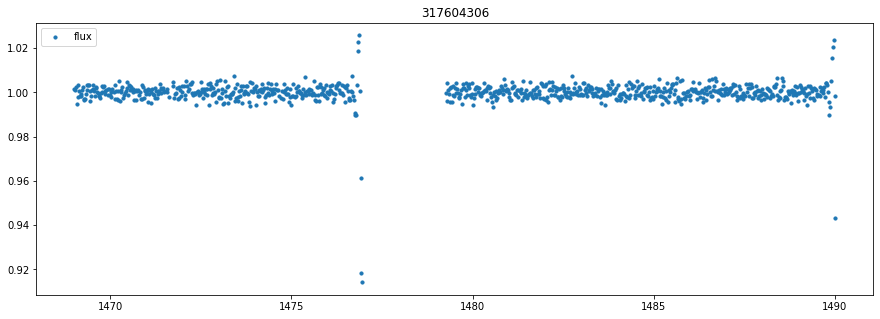

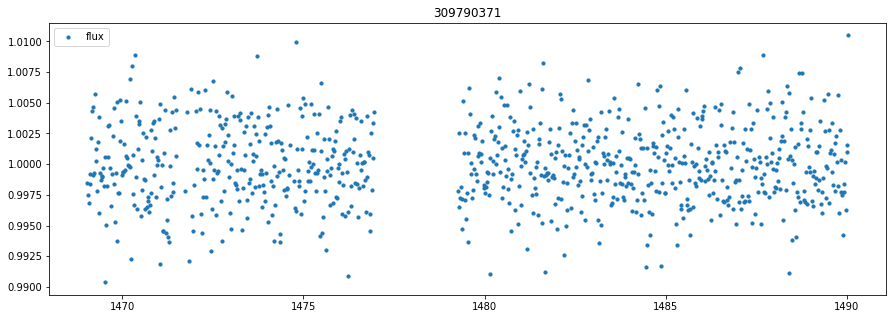

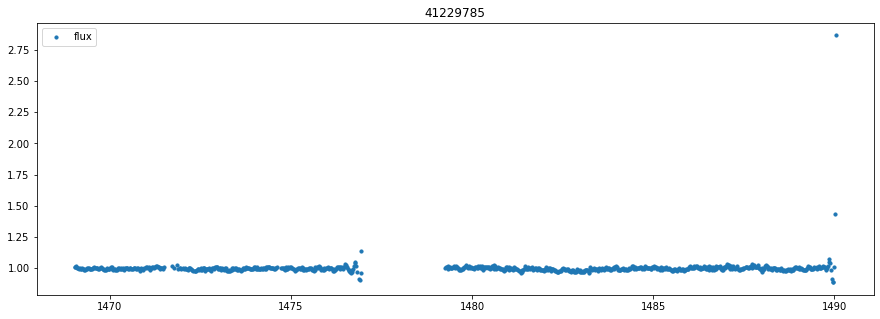

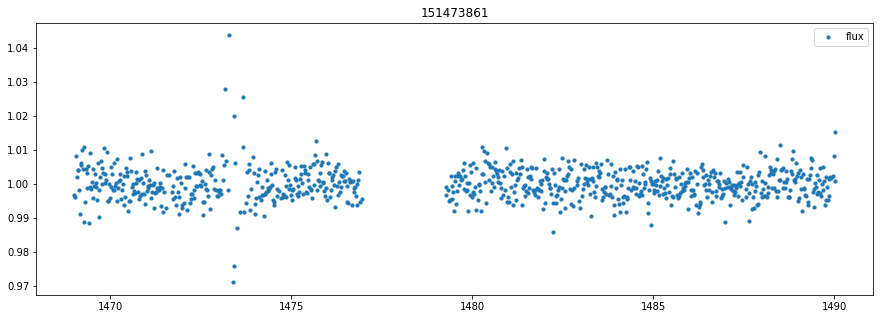

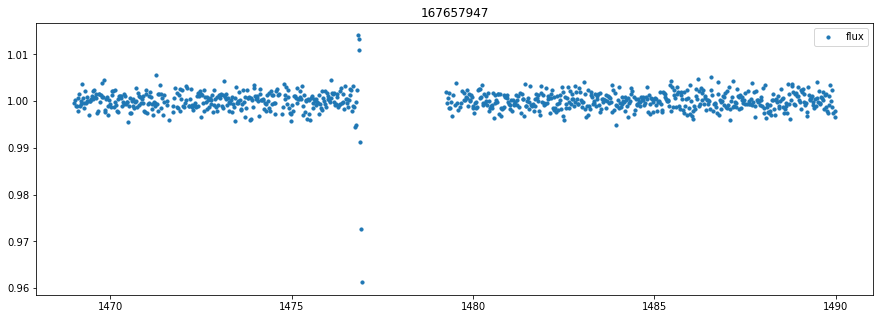

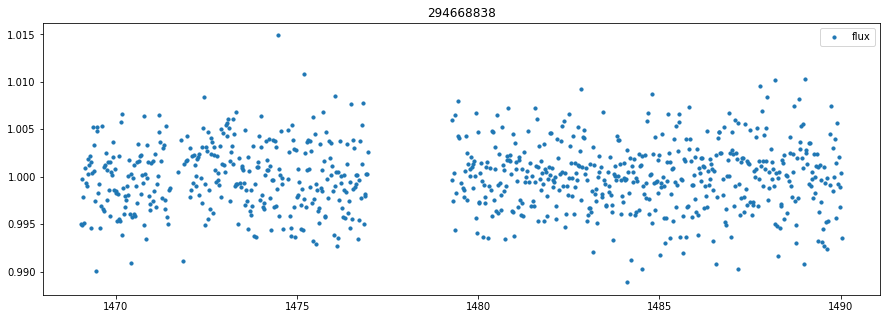

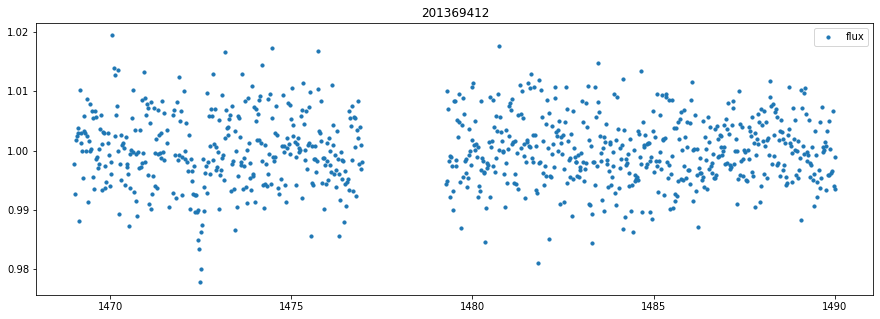

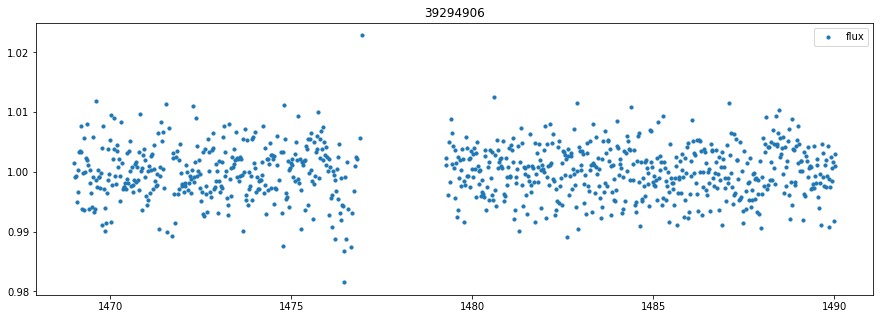

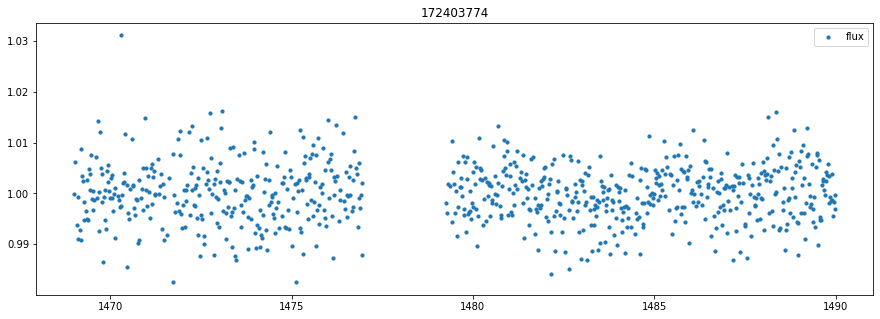

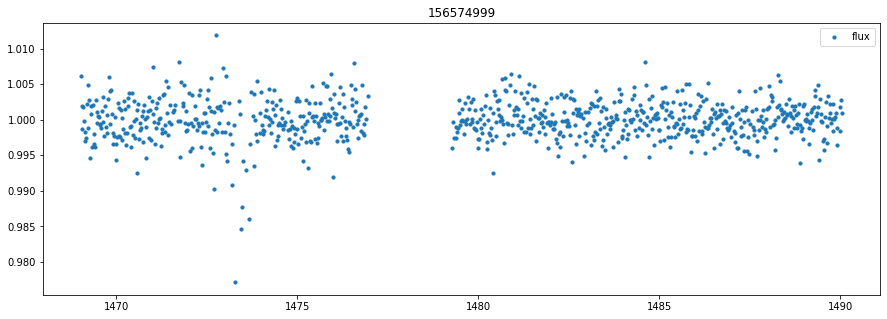

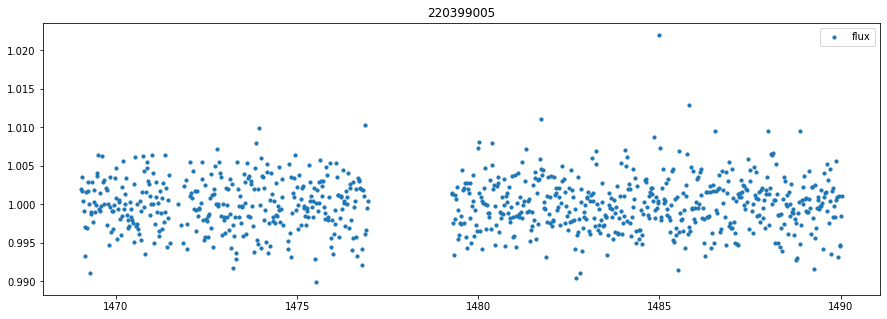

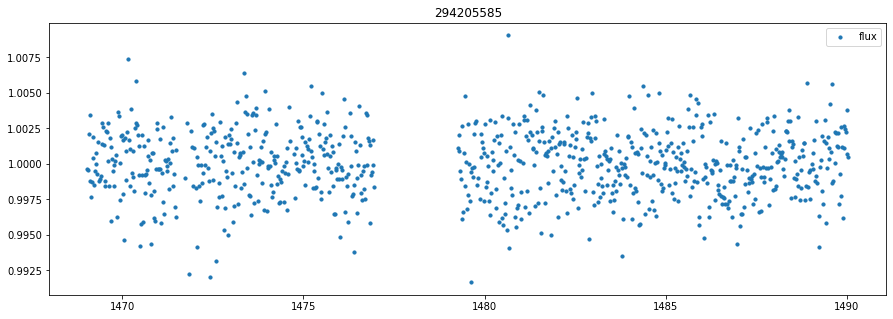

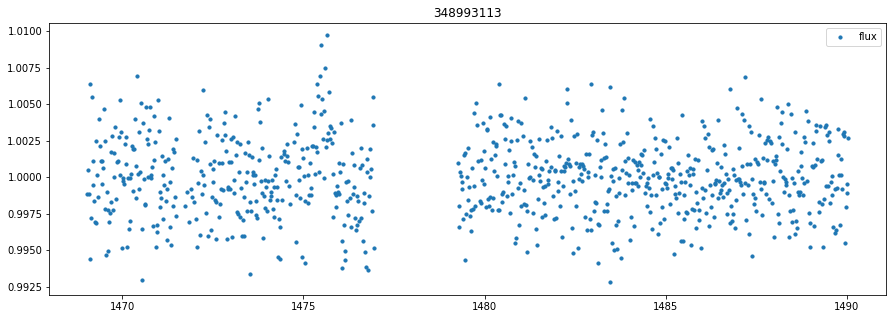

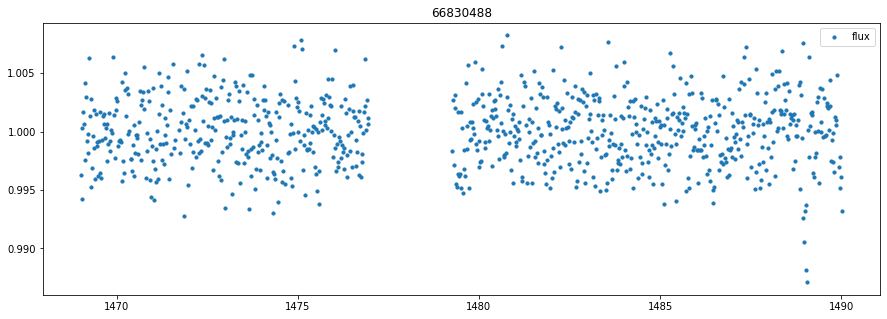

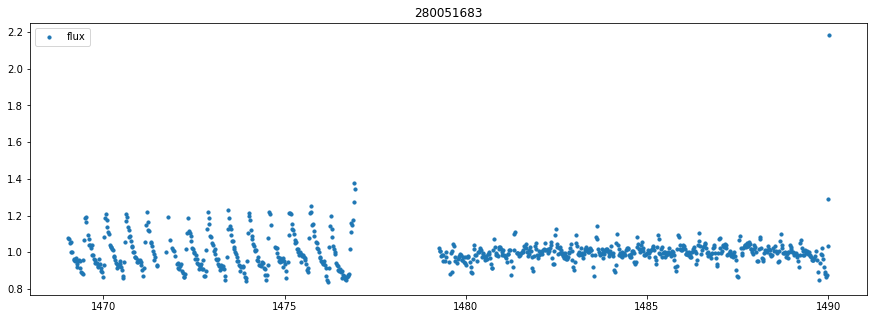

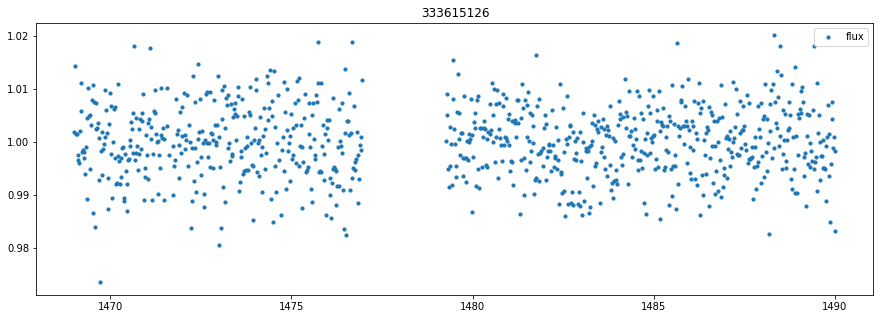

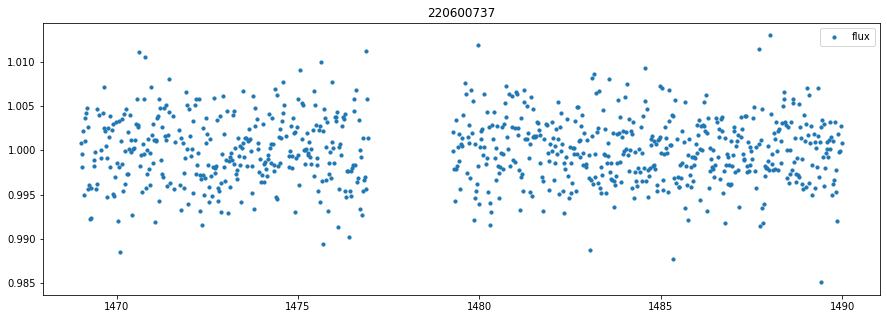

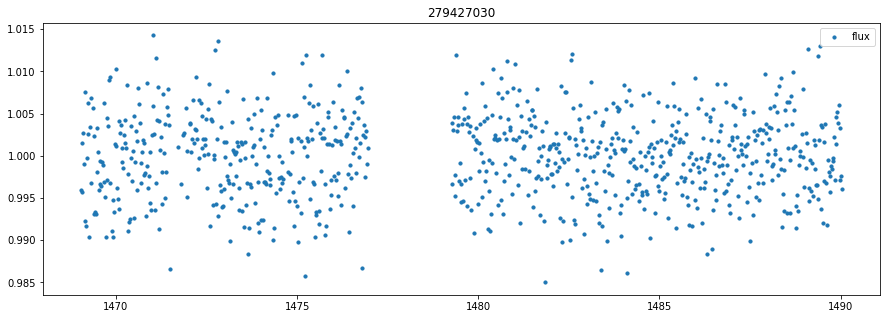

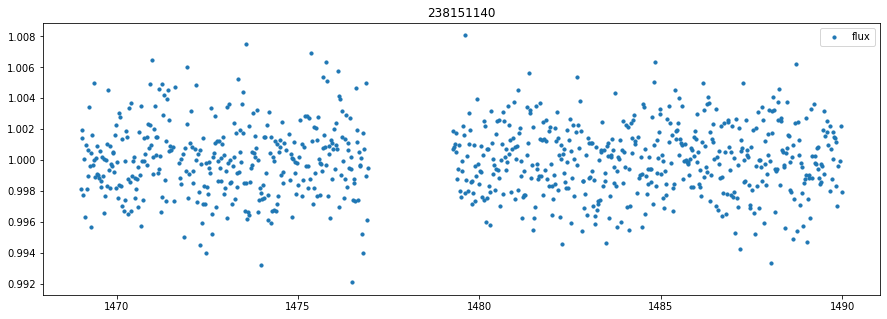

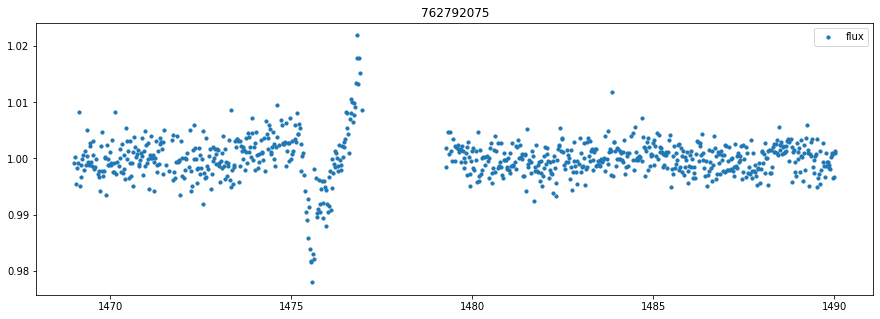

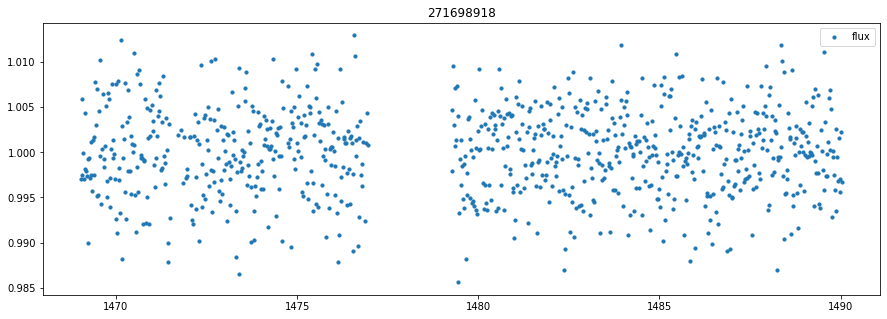

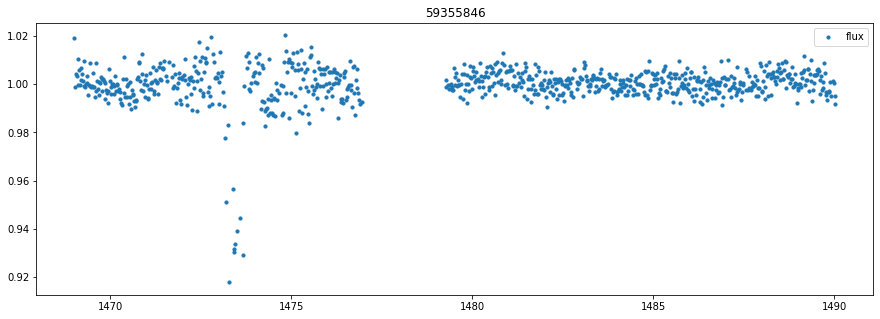

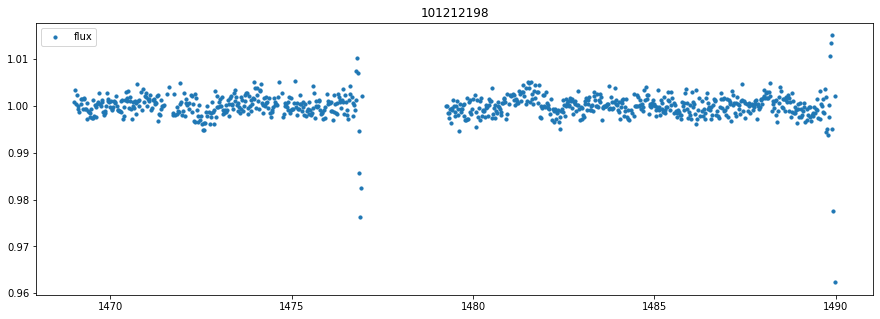

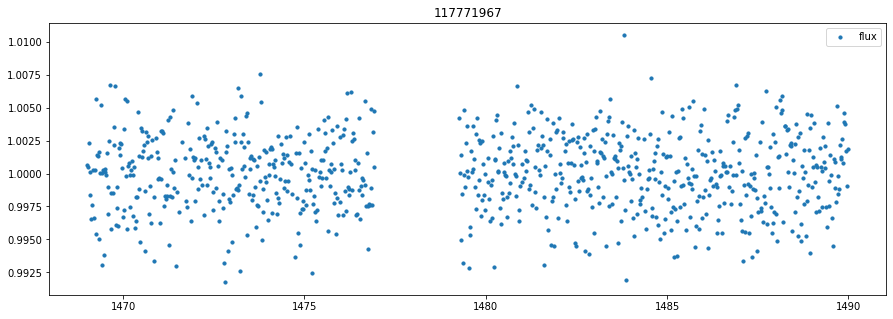

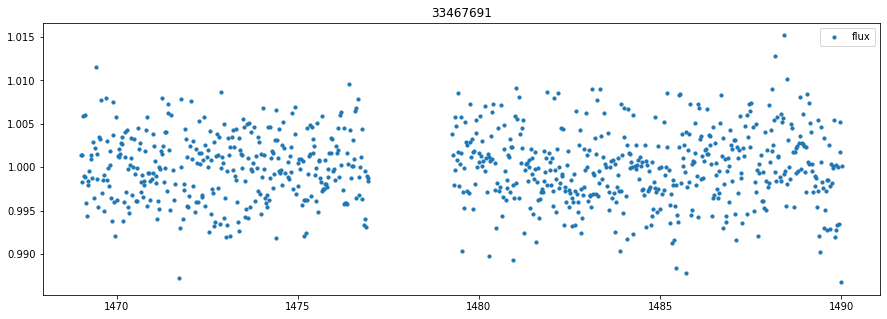

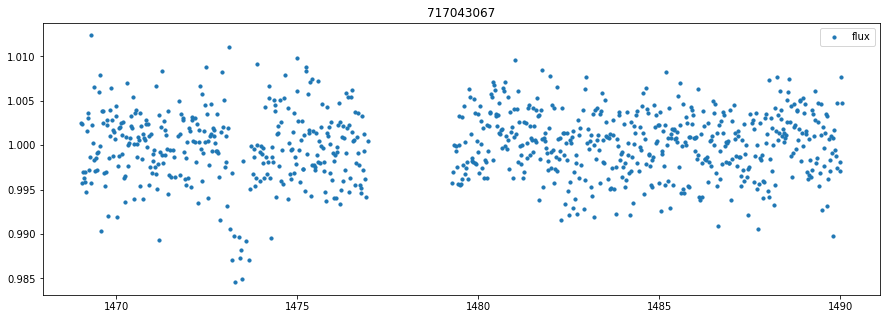

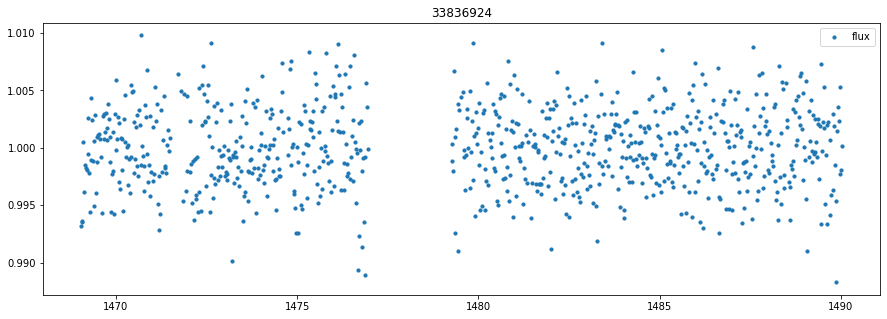

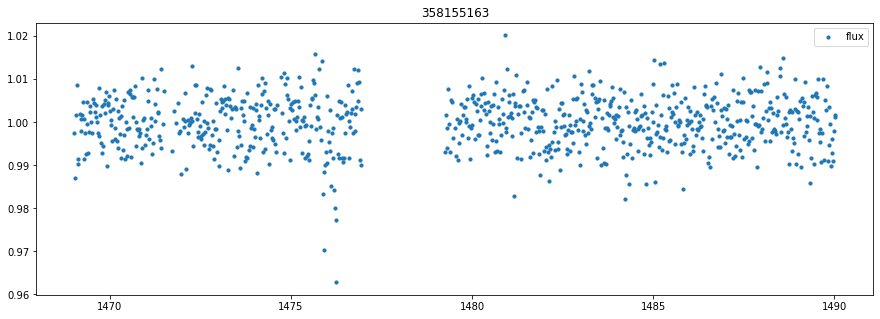

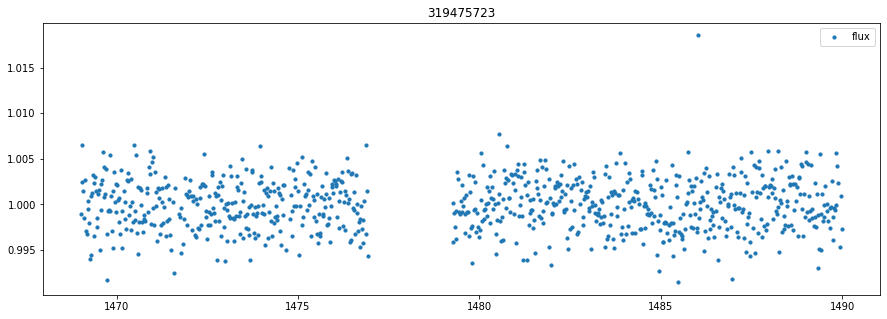

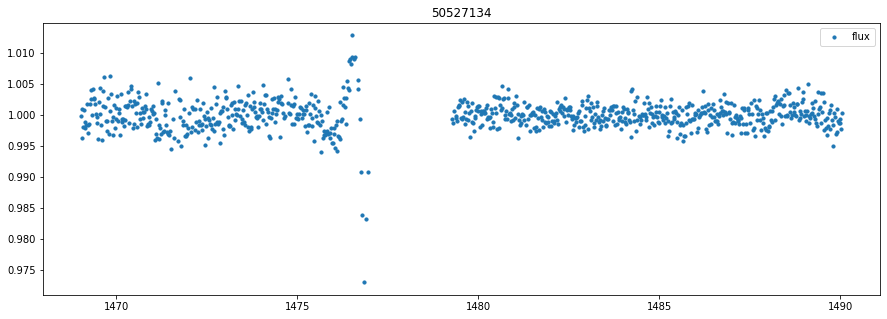

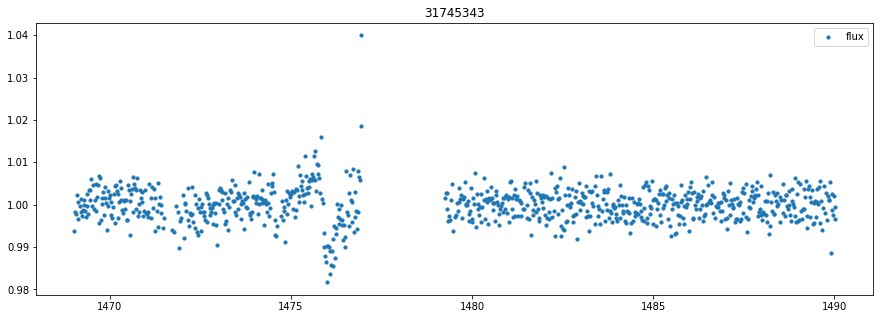

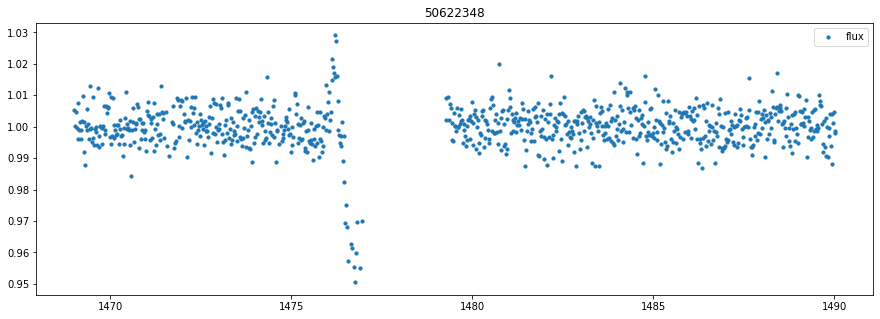

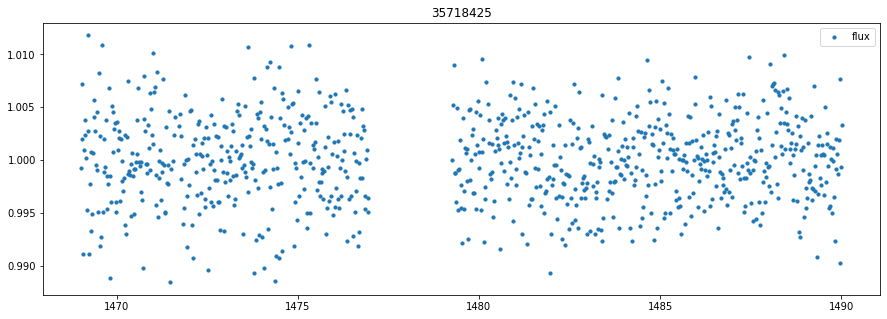

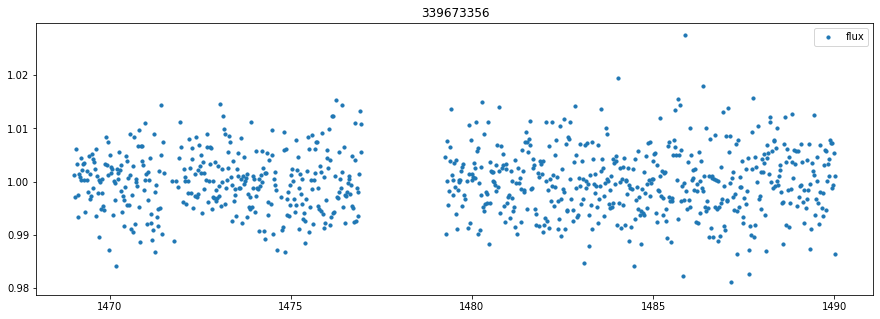

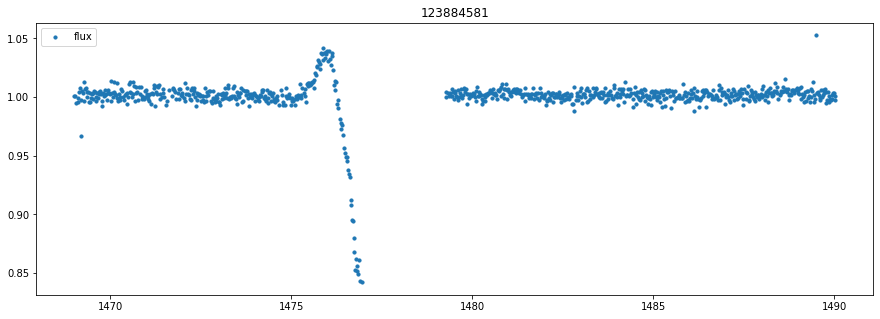

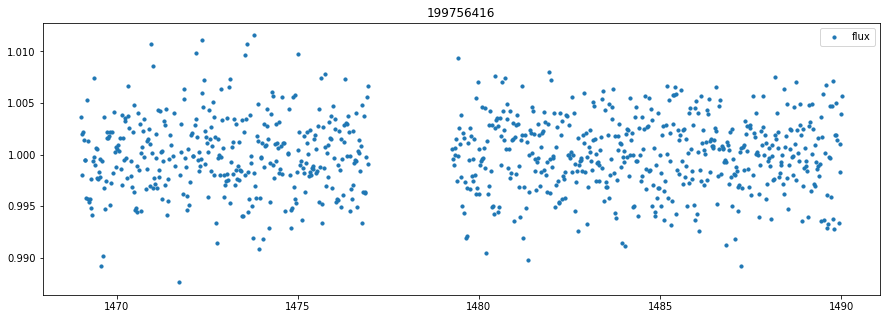

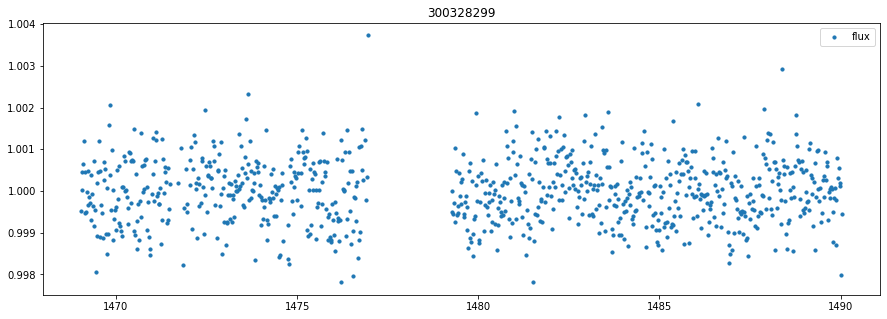

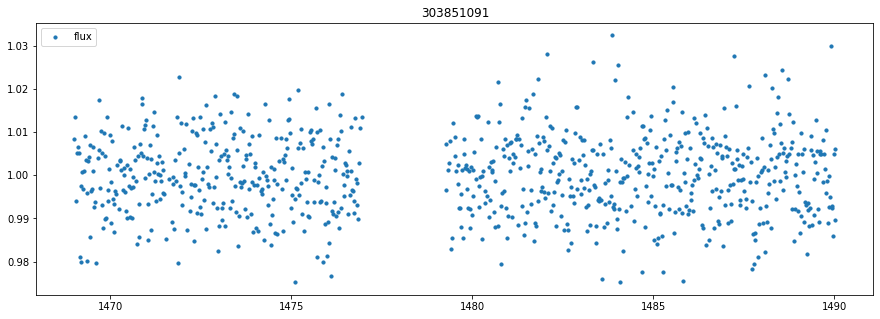

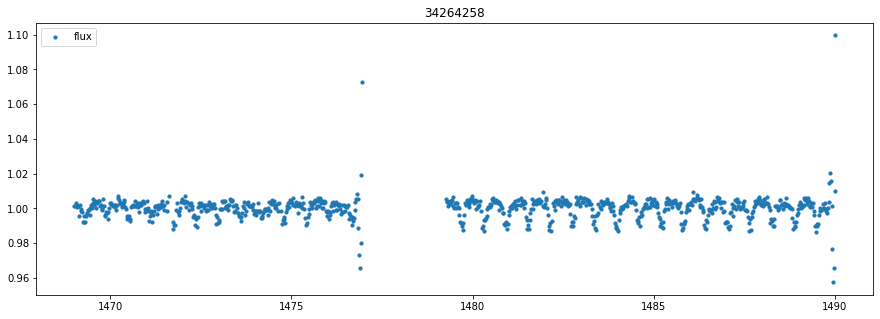

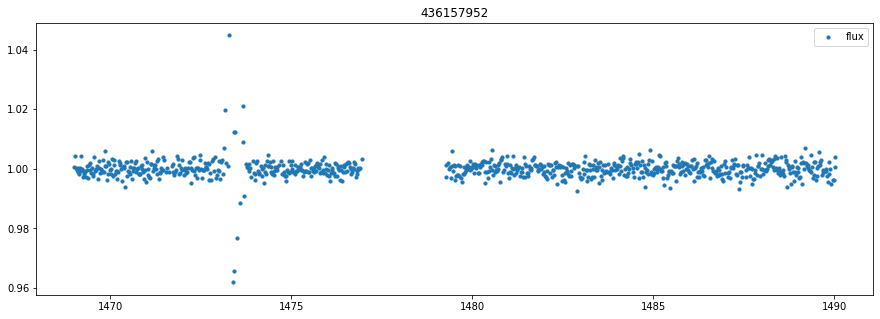

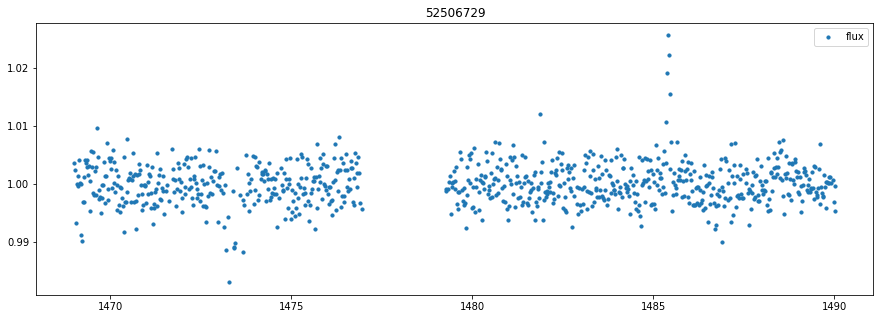

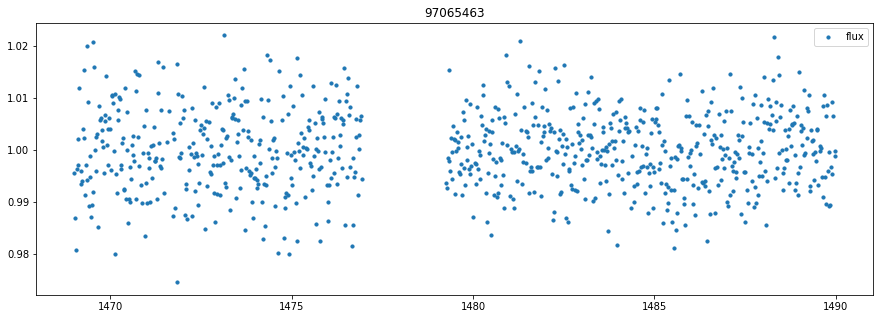

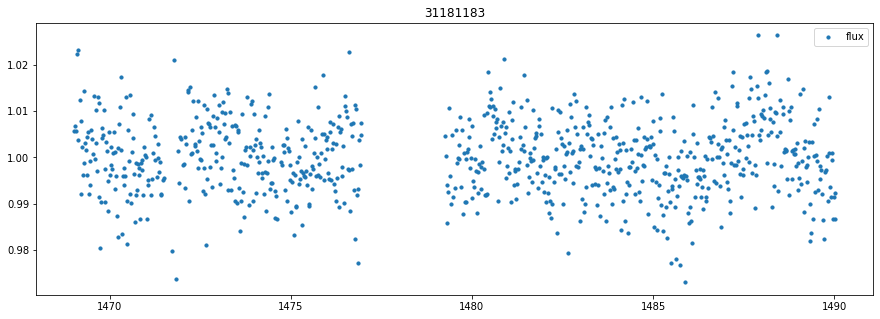

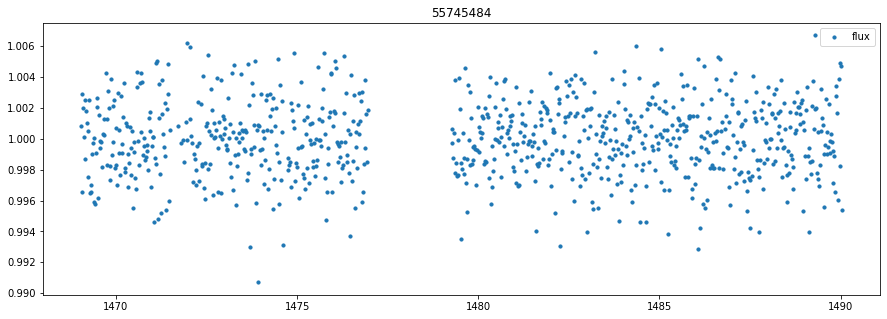

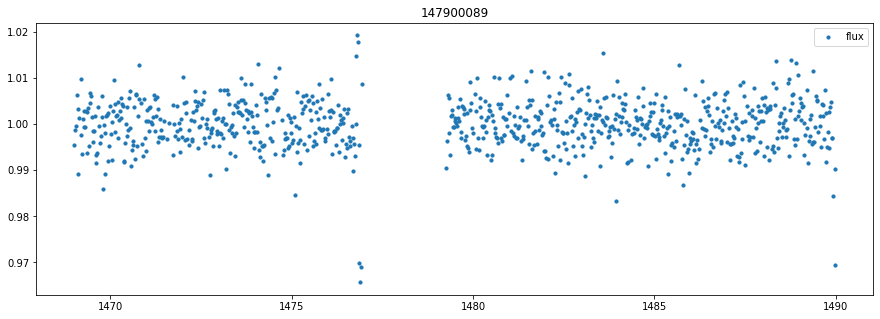

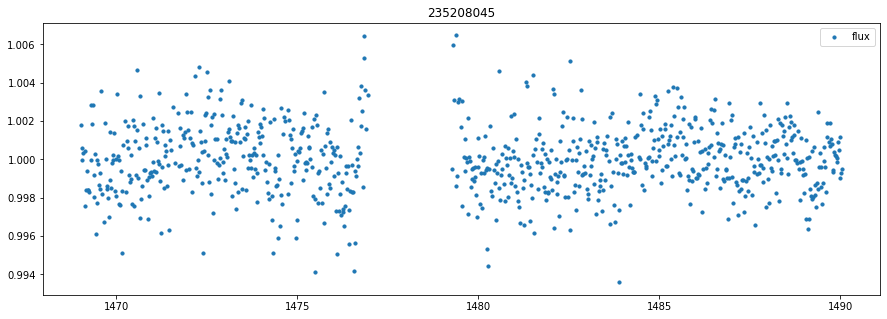

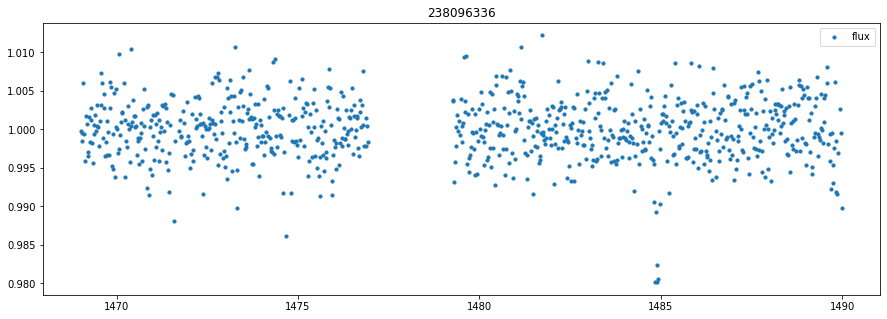

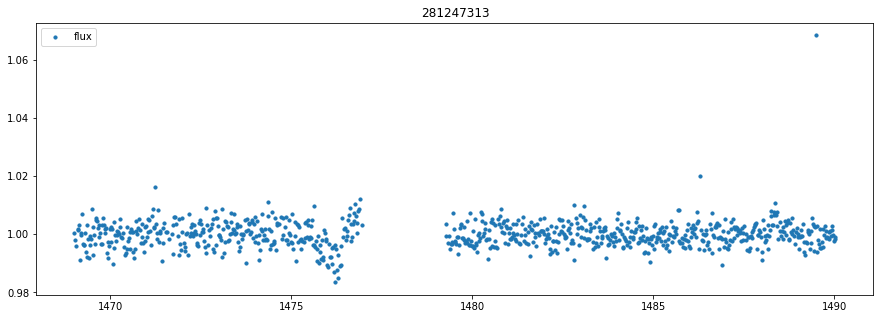

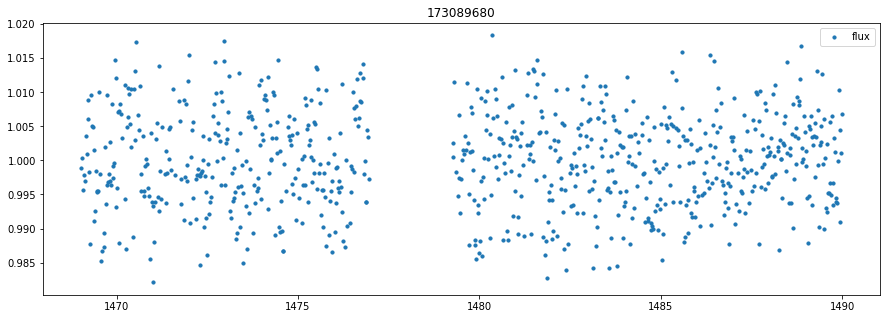

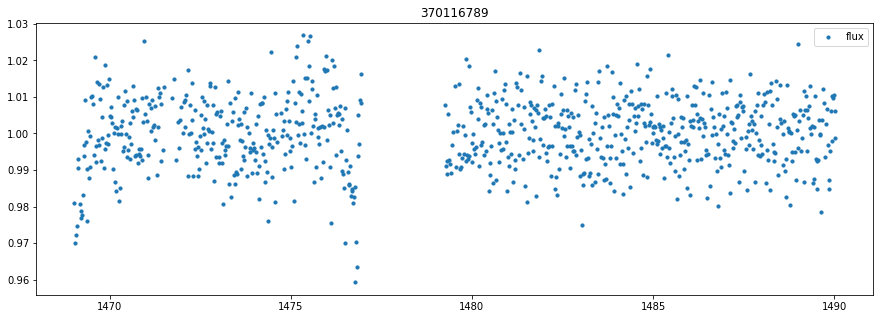

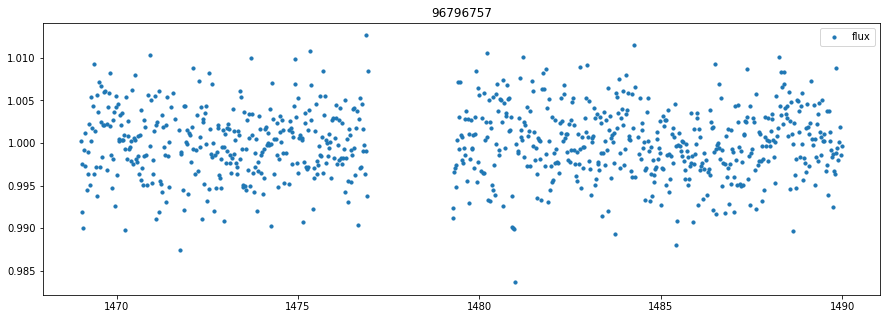

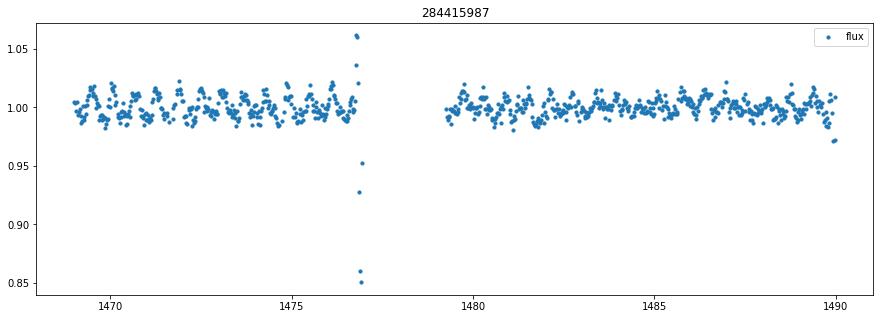

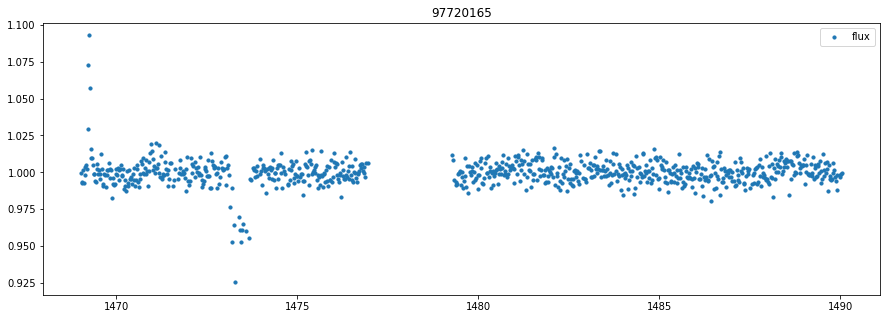

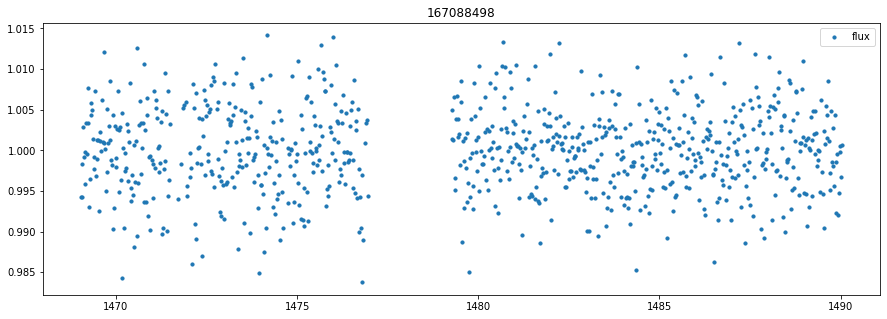

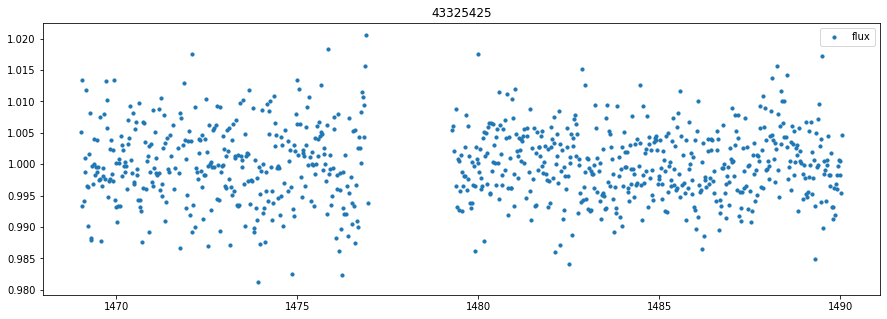

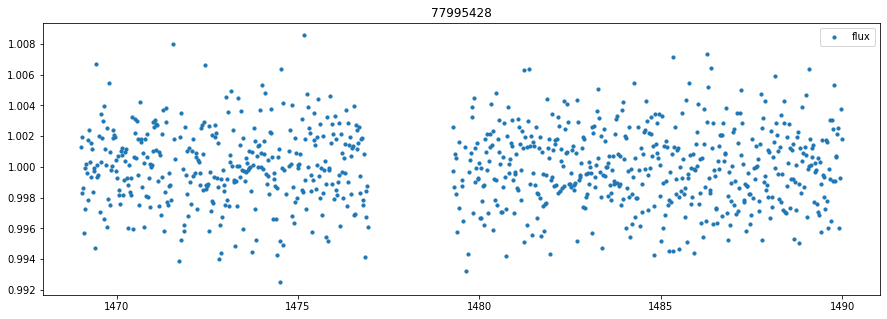

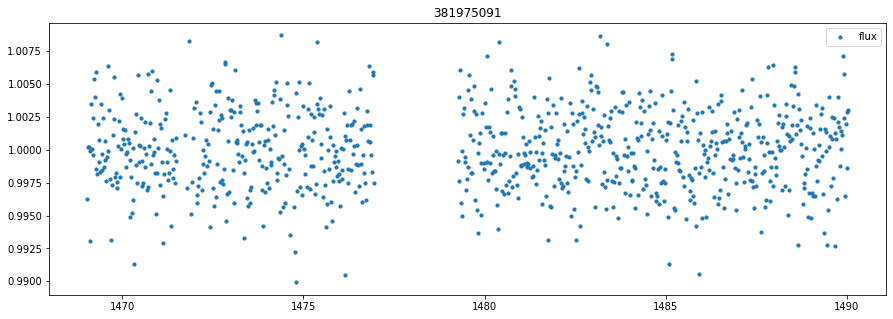

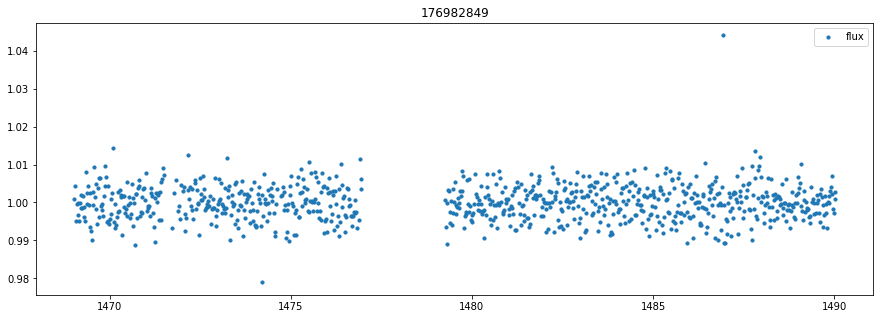

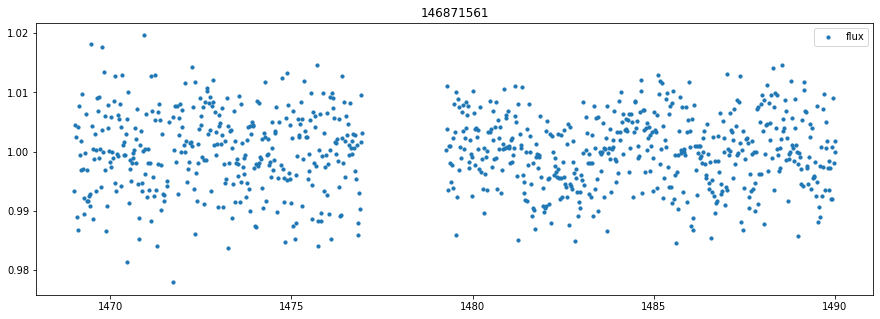

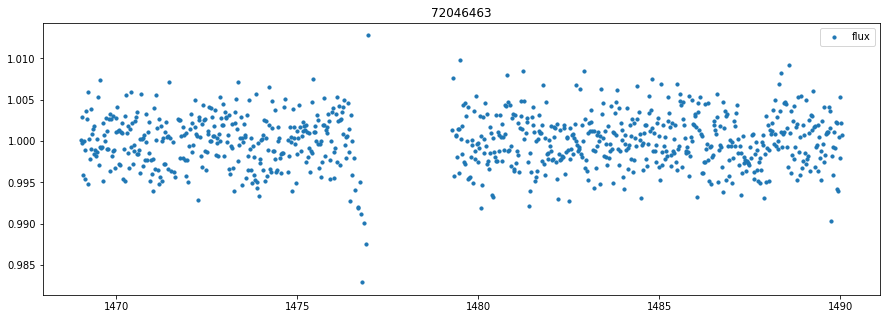

In [19]:
for i in box.file.head(100):
    #file_paths = glob.glob(os.path.join(path2,f'target/**/**/**/**/{i}'))[0]
    file_paths = glob.glob(os.path.join(path,f'**/{i}'))[0]
    #ref = pd.read_pickle(glob.glob(os.path.join(path,f'**/{i}'))[0])
    #table, store = import_lightcurve(file_paths)                     
    table,store = import_XRPlightcurve(file_paths,sector=sector,clip=4,drop_bad_points=True)
    camera = store[4]
    tic = store[0]
    chip = store[5]
    fig,ax = plt.subplots(1,figsize=(15,5))
    med = np.nanmedian(normalise_lc(table['corrected flux']))
    mad = median_absolute_deviation(normalise_lc(table['corrected flux']),ignore_nan=True)
    sig_clip_array = sigma_clip(normalise_lc(table['corrected flux']),sigma=6)
    ax.scatter(table['time'],normalise_lc(table['corrected flux']),s=10,label='flux')
    #ax.scatter(table['time'],sig_clip_array,s=10,c='orange',label='sigma clip to remove outliers')
    #ax.hlines(1-mad,xmin=table['time'][0],xmax=table['time'][-1],label='median line')
    ax.set_title(f"{tic}")
    ax.legend()
    plt.show()
 
    

### spoc

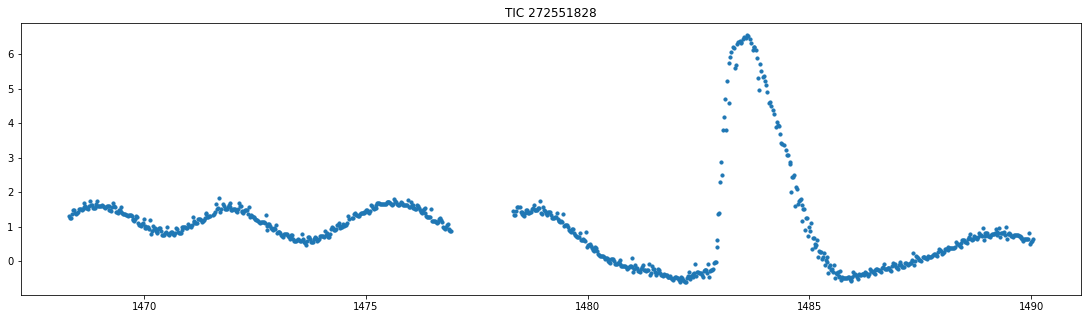

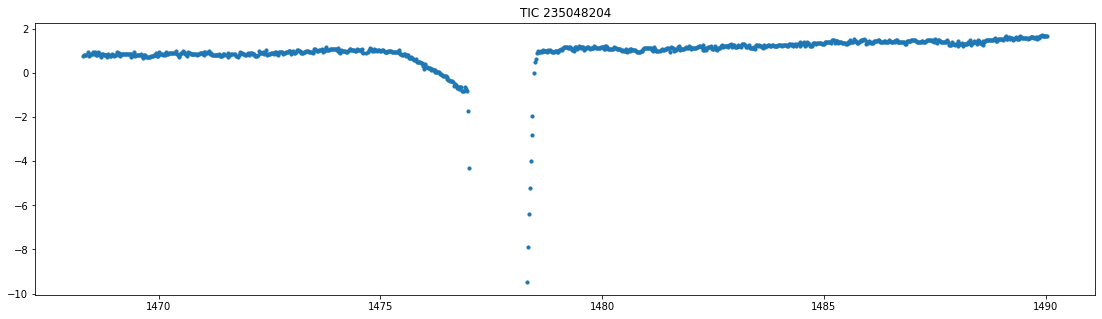

In [33]:
for i in box.file:
    file_paths = glob.glob(os.path.join(path2,f'target/**/**/**/**/{i}'))[0]
    table,store = import_lightcurve(file_paths)
    TIC = store[0]
    #camera = store[4]
    #tic = store[0]
    #chip = store[5]
    fig,ax = plt.subplots(1,figsize=(19,5))
   
    ax.scatter(table['TIME'],normalise_lc(table['PDCSAP_FLUX']),s=10,label='lightcurve')
    ax.set_title(TIC)
    plt.show()

    

### Comparing twostep and onestep at LS power 0.08


In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(random.asym_score,abs(random['signal/noise']),c='black',label='Twostep LS')
ax[0].axhline(y=5, color='blue', linestyle='-',label='SNR >= 5')
ax[0].scatter(random_onestep.asym_score,abs(random_onestep['signal/noise']),c='orange',label='Onestep LS')
ax[0].set_xlim([-1,2])
ax[1].scatter(random.asym_score,abs(random['signal/noise']),c='black',label='Twostep LS')
ax[1].scatter(random_onestep.asym_score,abs(random_onestep['signal/noise']),c='orange',label='Onestep LS')
ax[1].set_ylim([5,13])
ax[1].set_xlim([-1,2])
ax[0].legend()
ax[1].legend()
plt.show()

### Comparing twostep and onestep at LS power 0.05
- `random_05`: twostep at 0.05
- `random_onestep_05`: onestep at 0.05

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(random_05.asym_score,abs(random_05['signal/noise']),label='Twostep LS')
#plt.scatter(random_onestep.asym_score,random_onestep['signal/noise'])
ax[0].axhline(y=5, color='blue', linestyle='-',label='SNR >= 5')
ax[0].scatter(random_onestep_05.asym_score,abs(random_onestep_05['signal/noise']),label='Onestep LS',alpha=0.5)
ax[0].set_xlim([-1,2])
ax[1].scatter(random_05.asym_score,abs(random_05['signal/noise']),label='Twostep LS')
#plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[1].scatter(random_onestep_05.asym_score,abs(random_onestep_05['signal/noise']),label='Onestep LS',alpha=0.5)
ax[1].set_ylim([5,13])
ax[1].set_xlim([-1,2])
ax[0].legend()
ax[1].legend()
plt.show()

### Comparing Twostep LS at 0.08 and 0.05

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(random.asym_score,abs(random['signal/noise']),c='black',label='Twostep LS at 0.08')
#plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[0].axhline(y=5, color='blue', linestyle='-',label='SNR >= 5')
ax[0].scatter(random_05.asym_score,abs(random_05['signal/noise']),c='orange',label='Twostep LS at 0.05',alpha=0.5)
ax[0].set_xlim([-1,2])
ax[1].scatter(random.asym_score,abs(random['signal/noise']),c='black',label='Twostep LS at 0.08')
#plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[1].scatter(random_05.asym_score,abs(random_05['signal/noise']),c='orange',label='Twostep LS at 0.05',alpha=0.5)
ax[1].set_ylim([5,13])
ax[1].set_xlim([-1,2])
ax[0].legend()
ax[1].legend()
plt.show()

### Comparing Onestep LS at 0.08 and 0.05

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(random_onestep.asym_score,abs(random_onestep['signal/noise']),c='black',label='Twostep LS at 0.08')
#plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[0].axhline(y=5, color='blue', linestyle='-',label='SNR >= 5')
ax[0].scatter(random_onestep_05.asym_score,abs(random_onestep_05['signal/noise']),c='orange',label='Twostep LS at 0.05',alpha=0.5)
ax[0].set_xlim([-1,2])
ax[1].scatter(random_onestep.asym_score,abs(random_onestep['signal/noise']),c='black',label='Twostep LS at 0.08')
#plt.scatter(random_05.asym_score,random_05['signal/noise'])
ax[1].scatter(random_onestep_05.asym_score,abs(random_onestep_05['signal/noise']),c='orange',label='Twostep LS at 0.05',alpha=0.5)
ax[1].set_ylim([5,13])
ax[1].set_xlim([-1,2])
ax[0].legend()
ax[1].legend()
plt.show()

---